# O data setu weather_prediction:  

##### sve odabrane lokacije pružaju podatke
##### za varijable: 'cloud_cover', 'wind_speed', 'wind_gust', 'humidity', 'pressure', 'global_radiation' , 'precipitation', 'sunshine'   

##### prikupljanje uzoraka: dnevne registracije vremena od 2000. do 2010. godine
##### posmatranja su se odvijala u 14 gradova (u mom modelu sam fokusiran samo na Budimpeštu) 11 analiziranih karakteristika:    
##### month number, cloud cover, wind direction, wind speed, wind gust, humidity, sea level pressure, radiation, sunshine, mean, max outdoor temperature     
##### bbq_labels opisuje da li je moguće napraviti roštilj na otvorenom ovog dana ili ne


# O projektu:

Ciljevi projekta:
- Cilj je bio razviti model mašinskog učenja koji može predviđati određene karakteristike ili ponašanja na osnovu dostupnih podataka.
- Mogući ciljevi mogu uključivati predviđanje vremenskih uslova, kao i verovatnoće roštiljanja na osnovu meteoroloških podataka.

Rad sa datasetom:
- Analiza i priprema podataka: Uključuje učitavanje i istraživanje podataka, proveru i čišćenje podataka, kao i eventualnu transformaciju podataka radi poboljšanja performansi modela.
- Feature Engineering: Odabir i inženjering atributa koji se koriste za obučavanje modela. Ovo može uključivati izdvajanje relevantnih informacija iz dostupnih podataka, kao i stvaranje novih atributa.
- Normalizacija podataka: Proces skaliranja podataka na određeni opseg radi poboljšanja performansi modela.
- Preprocesiranje podataka: Uklanjanje nepotrebnih atributa, tretiranje nedostajućih vrednosti, kodiranje kategoričkih promenljivih, itd.

Obučavanje modela:
- Izbor algoritma: Odabir odgovarajućeg algoritma mašinskog učenja za rešavanje problema, kao što je SVM (Support Vector Machine).
- Treniranje modela: Korišćenje obučavajućeg skupa podataka za prilagođavanje modela kako bi naučio odnose između ulaznih atributa i ciljne promenljive.
- Optimizacija modela: Proces optimizacije parametara modela radi poboljšanja performansi.

Evaluacija modela:
- Testiranje modela: Evaluacija performansi modela na testnom skupu podataka kako bi se procenila tačnost i generalizacija.
- Interpretacija rezultata: Analiza rezultata modela, uključujući izveštaje o klasifikaciji, matrice konfuzije, tačnosti i drugih relevantnih metrika.
- Poboljšanje modela: Identifikacija oblasti gde model može biti poboljšan i iterativni proces ponovnog treniranja i evaluacije.

Generalno, vaš projekat obuhvata sve korake u tipičnom procesu razvoja modela mašinskog učenja, počevši od pripreme podataka, preko obučavanja modela, sve do evaluacije i iterativnog poboljšanja. Ovaj ciklus može se ponavljati kako bi se postigla što bolja tačnost i performanse modela.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import seaborn as sns # alat za vizualizaciju podataka prilikom analize

dataWeather = pd.read_csv("dataset/weather_prediction_dataset.csv")
labels = pd.read_csv("dataset/weather_prediction_bbq_labels.csv")

dataWeather.head(4)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8


In [2]:
# informacije o datasetu 
dataWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [3]:
# proveravanje nedostajucih vrednosti
dataWeather = dataWeather.dropna()
dataWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


Nakon ispuštanja redova sa nedostajućim vrednostima, to je isti broj uzoraka kao i ranije, tako da je skup podataka završen

In [4]:
# Analiza za BUDAPEST

# izabrao sam prve dve kolone i od 11 do 18 kolone
dataWeather_budapest = pd.concat([dataWeather.iloc[:,:2],dataWeather.iloc[:,11:19]],axis=1)
dataWeather_budapest['DATE'] = pd.to_datetime(dataWeather_budapest['DATE'],format='%Y%m%d') 

print(dataWeather_budapest)
print(dataWeather_budapest['DATE'])


           DATE  MONTH  BUDAPEST_cloud_cover  BUDAPEST_humidity  \
0    2000-01-01      1                     3               0.92   
1    2000-01-02      1                     8               0.94   
2    2000-01-03      1                     6               0.95   
3    2000-01-04      1                     8               0.94   
4    2000-01-05      1                     5               0.88   
...         ...    ...                   ...                ...   
3649 2009-12-28     12                     1               0.61   
3650 2009-12-29     12                     3               0.59   
3651 2009-12-30     12                     8               0.93   
3652 2009-12-31     12                     6               0.90   
3653 2010-01-01      1                     6               0.65   

      BUDAPEST_pressure  BUDAPEST_global_radiation  BUDAPEST_precipitation  \
0                1.0268                       0.52                    0.00   
1                1.0297                

In [5]:
# sada cu da uradim funkciju za brojanje srednjih vrednosti za karakteristike

def mean_for_mth(feature):
    mean = []
    for x in range(12):
        mean.append(
            float("{:.2f}".format(dataWeather_budapest[dataWeather_budapest['MONTH'] == (x+1)][feature].mean())))
    return mean

In [6]:
# uklanjam kolonu 'MONTH' iz DataFrame-a dataWeather_budapest, a zatim pozivam metodu describe() nad rezultujućim DataFrame-om.
dataWeather_budapest.drop(['MONTH'],axis=1).describe()

,DATE,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max
count,3654,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2004-12-31 12:00:00,4.890531,0.656505,1.016935,1.465487,0.136442,5.753229,12.174849,16.629091
min,2000-01-01 00:00:00,0.000000,0.260000,0.989100,0.040000,0.000000,0.000000,-9.800000,-6.600000
25%,2002-07-02 06:00:00,3.000000,0.540000,1.012100,0.580000,0.000000,1.100000,5.100000,8.400000
50%,2004-12-31 12:00:00,5.000000,0.650000,1.016500,1.340000,0.000000,5.900000,12.800000,17.400000
75%,2007-07-02 18:00:00,7.000000,0.770000,1.021475,2.310000,0.030000,9.600000,19.300000,25.000000
max,2010-01-01 00:00:00,8.000000,1.000000,1.043800,3.490000,6.960000,14.900000,33.100000,40.100000
std,NaN,2.386442,0.149603,0.007795,0.977986,0.408932,4.475439,8.744451,9.981538


Text(0, 0.5, 'DEGREE')

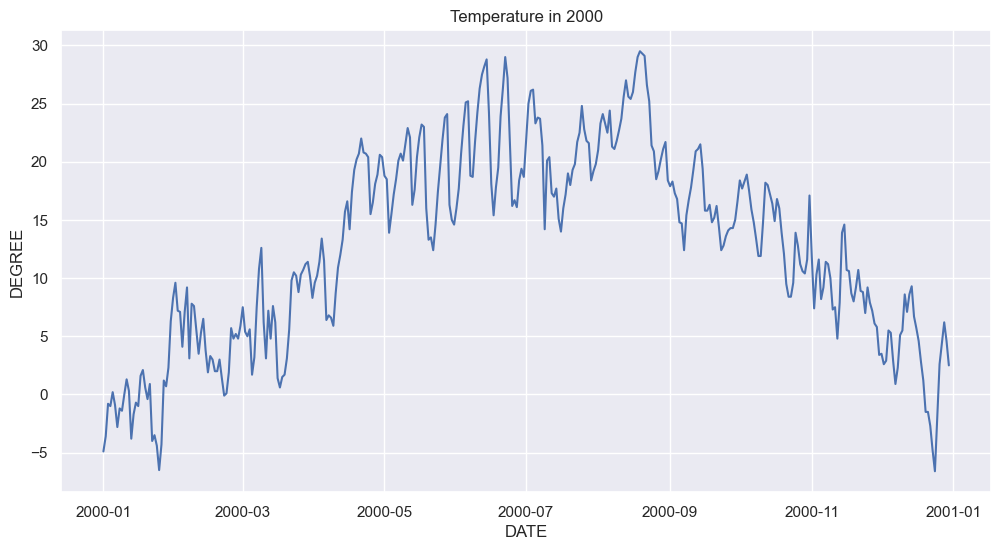

In [7]:
# kretanje prosečne temperaturu u Budimpešti tokom prvih 365 dana (godinu) iz dataWeather_budapest DataFrame-a, koristeći Seaborn za postavljanje stila i Matplotlib za kreiranje samog grafikona

sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.plot(dataWeather_budapest['DATE'][:365],dataWeather_budapest['BUDAPEST_temp_mean'][:365])
plt.title('Temperature in 2000')
plt.xlabel('DATE')
plt.ylabel('DEGREE')

[Text(0, 0, '0.85'),
 Text(0, 0, '2.78'),
 Text(0, 0, '6.91'),
 Text(0, 0, '13.13'),
 Text(0, 0, '18.03'),
 Text(0, 0, '20.97'),
 Text(0, 0, '22.67'),
 Text(0, 0, '22.37'),
 Text(0, 0, '16.98'),
 Text(0, 0, '12.42'),
 Text(0, 0, '6.94'),
 Text(0, 0, '1.57')]

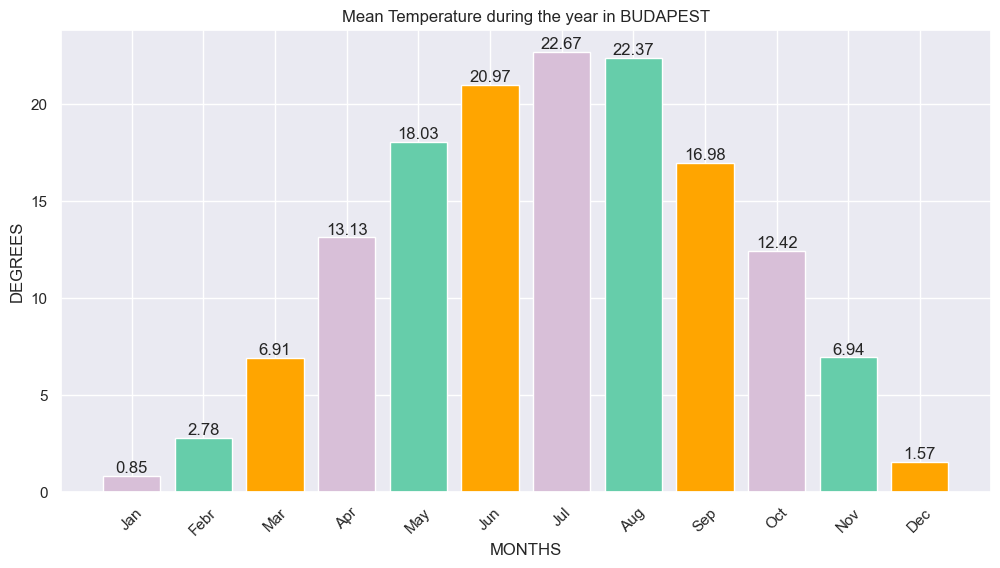

In [8]:
# kreiram stubičasti grafikon koji prikazuje prosečne temperature u Budimpešti tokom godine.
months = ['Jan', 'Febr', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mean_temp = mean_for_mth('BUDAPEST_temp_mean')
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
bar = plt.bar(x = months,height = mean_temp, width = 0.8, color=['thistle','mediumaquamarine', 'orange'])
plt.xticks(rotation = 45)
plt.xlabel('MONTHS')
plt.ylabel('DEGREES')
plt.title('Mean Temperature during the year in BUDAPEST')
plt.bar_label(bar)

[Text(0, 0, '0.77'),
 Text(0, 0, '0.71'),
 Text(0, 0, '0.64'),
 Text(0, 0, '0.55'),
 Text(0, 0, '0.56'),
 Text(0, 0, '0.57'),
 Text(0, 0, '0.58'),
 Text(0, 0, '0.59'),
 Text(0, 0, '0.64'),
 Text(0, 0, '0.72'),
 Text(0, 0, '0.77'),
 Text(0, 0, '0.79')]

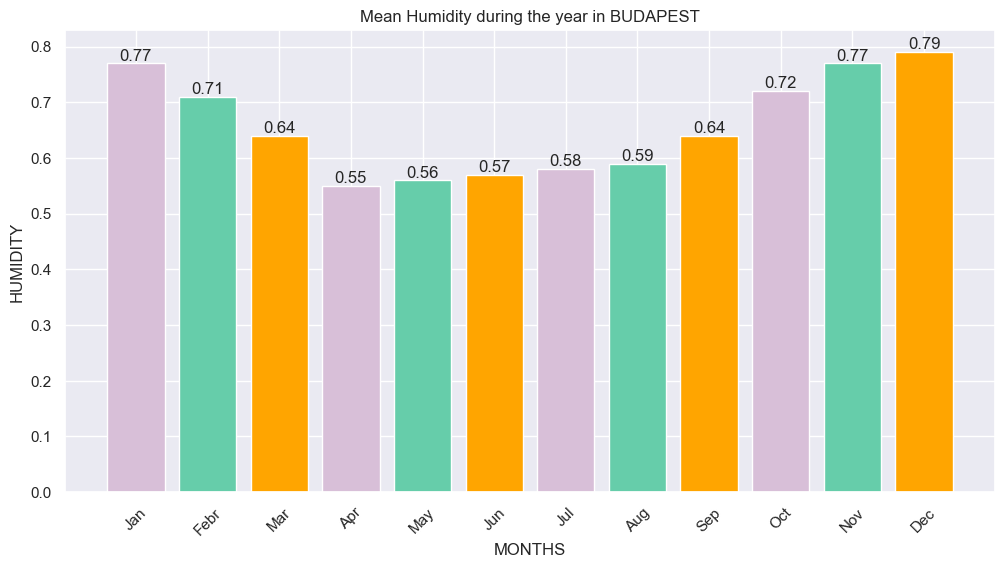

In [9]:
# prikaz prosečne vlažnosti vazduha u Budimpešti tokom godine
sns.set(style="darkgrid")
mean_temp = mean_for_mth('BUDAPEST_humidity')
plt.figure(figsize=(12,6))
bar = plt.bar(x = months, height = mean_temp, width = 0.8, color=['thistle','mediumaquamarine', 'orange'])
plt.xticks(rotation = 45)
plt.xlabel('MONTHS')
plt.ylabel('HUMIDITY')
plt.title('Mean Humidity during the year in BUDAPEST')
plt.bar_label(bar)

<Axes: xlabel='BUDAPEST_global_radiation', ylabel='Count'>

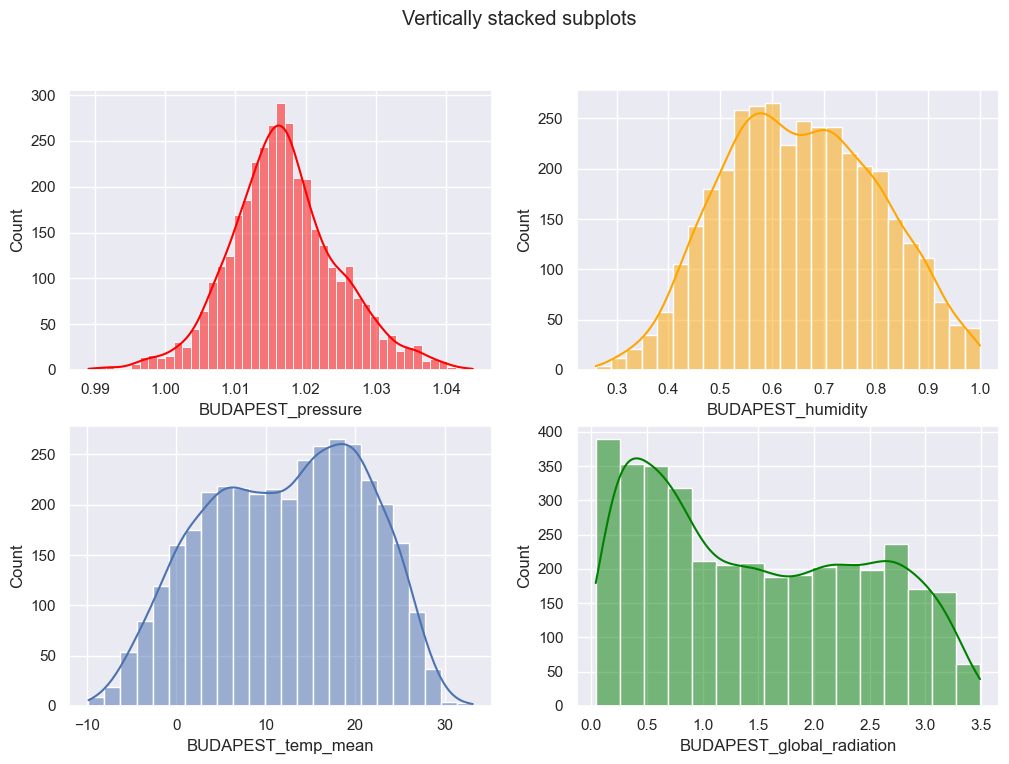

In [10]:
# generisanje višestrukih histograma prikazanih u obliku mreže od 2x2 sa različitim meteorološkim podacima

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle('Vertically stacked subplots')
sns.histplot(data = dataWeather_budapest, x ='BUDAPEST_pressure', ax=axs[0,0], color='red', kde=True)
sns.histplot(data = dataWeather_budapest, x ='BUDAPEST_humidity', ax=axs[0,1], color='orange', kde=True)
sns.histplot(data = dataWeather_budapest, x ='BUDAPEST_temp_mean', ax=axs[1,0], kde=True)
sns.histplot(data = dataWeather_budapest, x ='BUDAPEST_global_radiation', ax=axs[1,1], color='green', kde=True)

[Text(0.5, 1.0, 'Labels for BUDAPEST')]

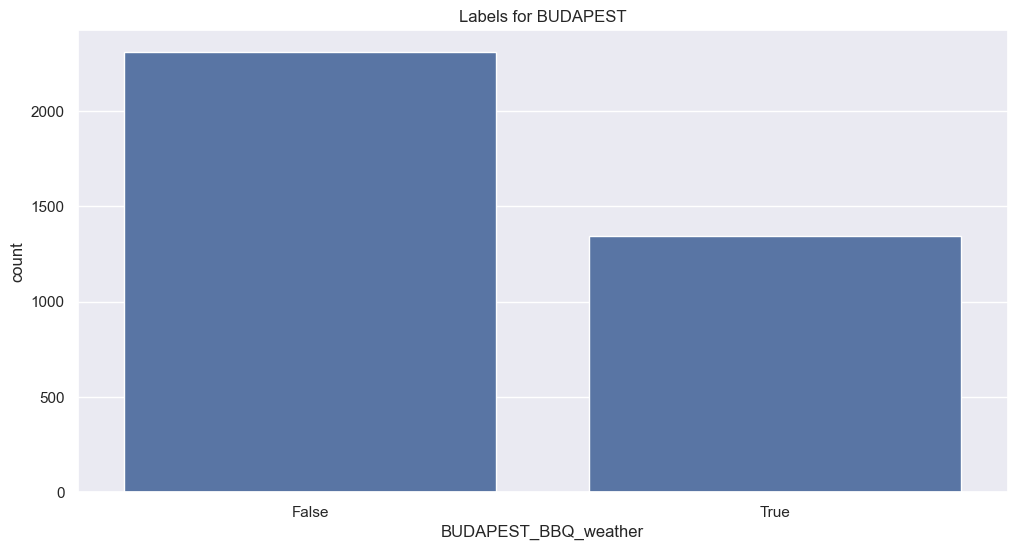

In [11]:
# generisanje brojačkog grafikona (countplot) koji prikazuje distribuciju različitih BBQ_labels za vremenske uslove u Budimpešti.
labels_budapest = labels['BUDAPEST_BBQ_weather']
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x = labels_budapest).set(title='Labels for BUDAPEST')

In [12]:
true_val = len(labels_budapest[labels_budapest == True])
false_val = len(labels_budapest[labels_budapest == False])
print('Procenat True vrendosti: {0:.2f}%'.format(true_val/(true_val+false_val)*100))
print('Procenat False vrednosti: {0:.2f}%'.format(false_val/(true_val+false_val)*100))

Procenat True vrendosti: 36.75%
Procenat False vrednosti: 63.25%


[Text(0.5, 1.0, 'Odnos između temperature i vremena za roštilj')]

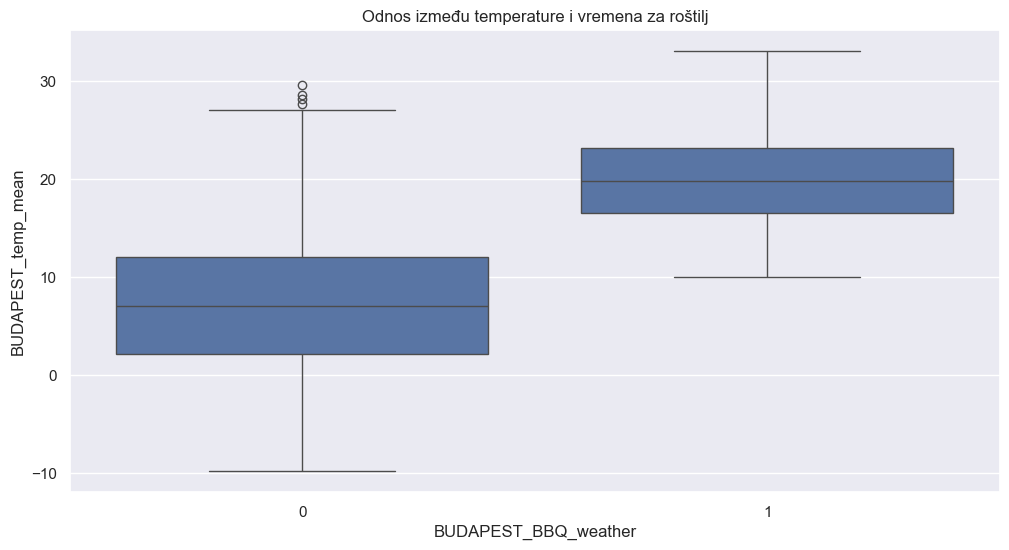

In [13]:
# kombinujem Pandas, Seaborn i Matplotlib da bi generisao kutijasti dijagram (boxplot) koji prikazuje odnos između prosečne temperature i oznaka vremenskih uslova u Budimpešti.
labels_budapest = labels_budapest.astype(int)
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.boxplot(y = dataWeather_budapest['BUDAPEST_temp_mean'], x = labels_budapest).set(title='Odnos između temperature i vremena za roštilj')

Skup podataka za Budimpeštu ima više uzoraka sa oznakama "False" nego sa oznakama "True", gotovo dvostruko više. Ovo se naziva neuravnoteženom distribucijom podataka. Neuravnoteženost podataka može biti izazov prilikom obučavanja modela za mašinsko učenje, posebno kada je potrebno da model efikasno nauči karakteristike obe klase kako bi donosio tačne zaključke ili predikcije. U ovom slučaju, važno je pažljivo upravljati neuravnoteženošću podataka kako bi se osigurala pouzdanost i preciznost modela.

In [14]:
# moramo da resimo ovu neizbalansiranost podataka

from imblearn.over_sampling import RandomOverSampler # za rukovanje neuravnoteženošću podataka u skupu podataka dataWeather_budapest i labels_budapest.

labels_budapest = labels_budapest.astype(int) # pretvaranje u celobrojne vrednosti 
df_budapest = dataWeather_budapest.drop(['DATE'],axis=1) # izbacujemo date iz tabele, datumi se ne koriste kao atributi za predikciju u modelima mašinskog učenja
oversample = RandomOverSampler()
ovrspl_X, ovrspl_y  = oversample.fit_resample(dataWeather_budapest, labels_budapest) # metoda fit_resample da bi se preoblikovao skup podataka

# ovo radi tako što replicira uzorke iz manje zastupljene klase (u ovom slučaju, oznaka "True") dok se ne postigne ravnoteža između klasa. ovrspl_X predstavlja nove podatke (atribute), dok ovrspl_y predstavlja nove oznake (ciljne vrednosti).

[Text(0.5, 1.0, 'postupak dodavanja dodatnih uzoraka kako bi se postigla ravnoteža između klasa za Budimpestu')]

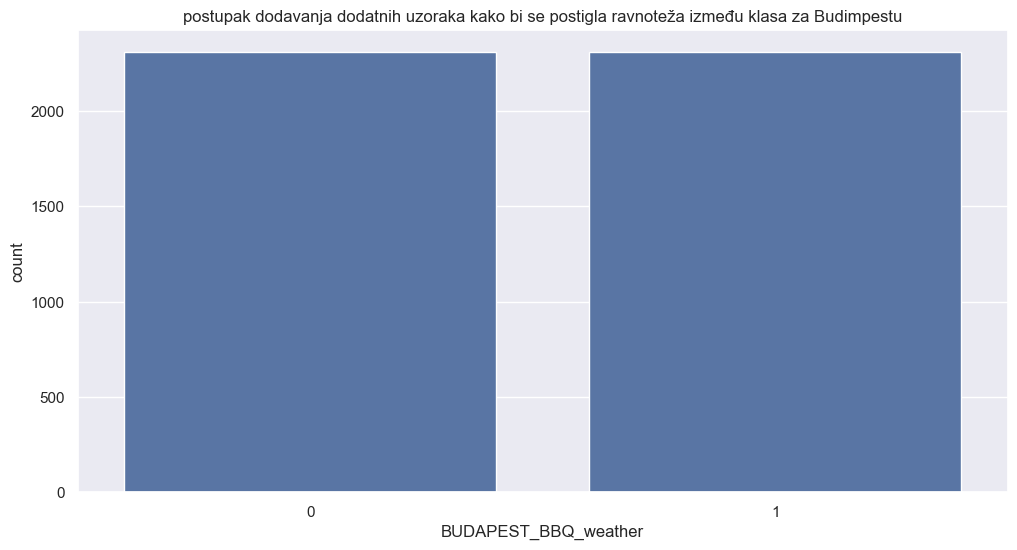

In [15]:
labels_budapest = labels['BUDAPEST_BBQ_weather']
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x = ovrspl_y).set(title='postupak dodavanja dodatnih uzoraka kako bi se postigla ravnoteža između klasa za Budimpestu')

In [16]:
true_val = len(ovrspl_y[ovrspl_y == 1])
false_val = len(ovrspl_y[ovrspl_y == 0])
print('Precent of True values: {0:.1f}%'.format(true_val/(true_val+false_val)*100))
print('Precent of False values: {0:.1f}%'.format(false_val/(true_val+false_val)*100))

Precent of True values: 50.0%
Precent of False values: 50.0%


Nakon upotrebe RandomOverSampler-a dobio sam isti broj labels

[Text(0.5, 1.0, 'Korelacije izmedju karakteristika')]

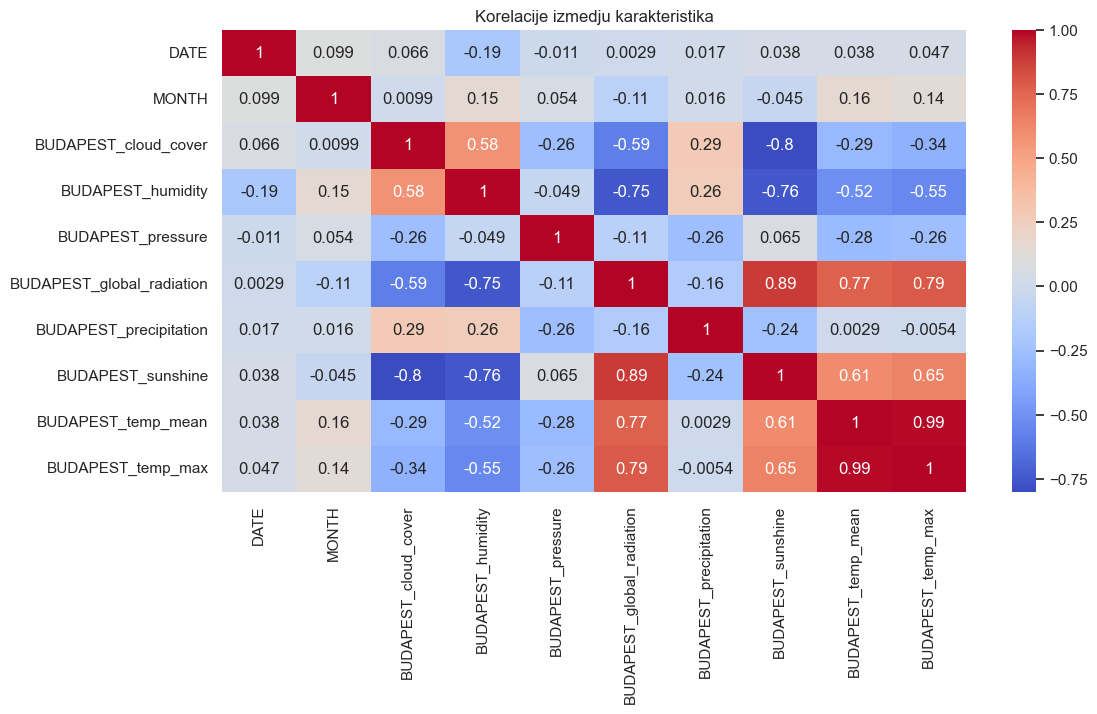

In [17]:
# generiše toplotnu mapu korelacije između atributa u DataFrame-u dataWeather_budapest pomoću biblioteke Seaborn.
# korelacija -  stepen veze ili odnosa između dva numerička seta podataka. Koristi se kako bi se utvrdilo da li i kako se menjaju vrednosti jednog skupa podataka u odnosu na vrednosti drugog skupa podataka.
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.heatmap(dataWeather_budapest.corr(),annot=True,cmap='coolwarm').set(title='Korelacije izmedju karakteristika')
# Generiše toplotnu mapu korelacije. dataWeather_budapest.corr() računa matricu korelacije između svih parova atributa u DataFrame-u. Zatim, sns.heatmap() prikazuje ovu matricu kao toplotnu mapu. Argument annot=True dodaje numeričke vrednosti korelacije na mapu, a cmap='coolwarm' postavlja paletu boja koja se koristi za prikazivanje korelacije.

visoka korelacija između globalnog zračenja i sunčeve svetlosti, srednje i maksimalne temperature
skoro potpuna korelacija između srednje i maksimalne temperature
visoka inverzna korelacija između sunca i vlage, sunca i oblaka, globalnog zračenja i vlage

# Normalizacija podataka

In [18]:
from sklearn.preprocessing import MinMaxScaler # biblioteka za normalizaciju podataka
# Namera mi je da skaliram podatke na opseg od 0 do 1 (MinMaxScaler)
# Normalizacija podataka

# moram da filtriram sve ne numericke vrednosti 
numerical_columns = ovrspl_X.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
norm_X = scaler.fit_transform(ovrspl_X[numerical_columns]) # normalizujem ulazni skup podataka

# fit_transform metod obučava skaler na osnovu podataka i zatim primenjuje transformaciju na podatke

norm_X = pd.DataFrame(norm_X, columns=numerical_columns) # Normalizovani podaci se konvertuju nazad u DataFrame sa istim kolonama kao i originalni skup podataka ovrspl_X.
 
# Prikaz opisa normalizovanih podataka, zaokruzenih na 2 
norm_X.describe().round(2)

,MONTH,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max
count,4622.00,4622.00,4622.00,4622.00,4622.00,4622.00,4622.00,4622.00,4622.00
mean,0.51,0.58,0.51,0.51,0.47,0.02,0.44,0.55,0.54
std,0.29,0.29,0.20,0.13,0.29,0.05,0.30,0.20,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.27,0.38,0.35,0.42,0.20,0.00,0.14,0.39,0.37
50%,0.55,0.62,0.49,0.50,0.47,0.00,0.47,0.59,0.58
75%,0.73,0.88,0.65,0.58,0.72,0.00,0.70,0.71,0.70
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [19]:
from sklearn.model_selection import train_test_split # za podelu skupa podataka na skup za obučavanje (training set) i skup za testiranje (testing set)

# Podela skupa podataka na skupove podataka za obuku i testiranje
X_train, X_test, y_train, y_test = train_test_split(ovrspl_X,ovrspl_y, test_size = 0.3, random_state = 42) # velicina skupa za testiranje je 0.3 tj 30% od ukupnog skupa podataka
# random_state je način da se osigura reproduktivnost pri deljenju podataka. Kada koristima slucajnost (npr neuronske mreze ili raspodela uzoraka pri obučavanju modela), ovo  je korisceno da bi se generisali slucajni rezultati, u procesu generisanja slucajnih brojeva
print('Training set: ' + str(len(X_train)))
print('Testing set: ' + str(len(X_test)))

Training set: 3235
Testing set: 1387


In [20]:
from sklearn.svm import SVC # sklearn.svm uvozi Support Vector Machine (SVM) klasifikator

X_train_no_datetime = X_train.select_dtypes(exclude=['datetime64']) 
# X_train se filtrira kako bi se izdvojili atributi koji nisu tipa datetime64, koristeći select_dtypes metodu za selekciju kolona na osnovu njihovih tipova podataka.

# kreiranje SVC modela sa odredjenim parametrima
model = SVC(verbose=True, kernel = 'linear', random_state = 0)
# verbrose=True -> za ispitivanje detalja tokom obucavanja modela

# kernel = 'linear' -> koristi linearni kernel za SVM, model pokusava da pronadje granicu izmedju klasa u prostoru atributa

# random_state = 0 -> isto kao u prethodnom slucaju da se osigrura reproduktivnost modela


model.fit(X_train_no_datetime,y_train) 

# Obučava SVM model na preprocesiranom skupu podataka bez atributa tipa datetime64. Ovaj korak je ključan za uklanjanje atributa koji nisu numeričkog tipa, kao što su datumi, koji SVM modelu ne bi bio koristan prilikom obučavanja. Nakon obučavanja, model je spreman za predviđanja.

[LibSVM]

SVC(kernel='linear', random_state=0, verbose=True)

Izveštaj o klasifikaciji --------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       712
           1       0.91      0.98      0.95       675

    accuracy                           0.95      1387
   macro avg       0.95      0.95      0.95      1387
weighted avg       0.95      0.95      0.95      1387


[Text(0.5, 1.0, 'Confusion Matrix')]

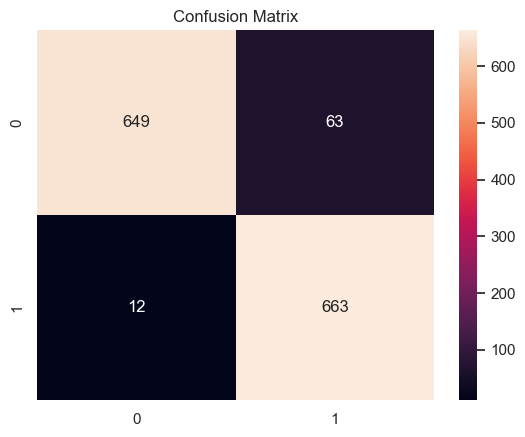

In [21]:
# za evaluaciju performansi klasifikacionih modela:
# classification_report: Generiše detaljan izveštaj o preciznosti, odzivu, F1 meri i podršci za svaku klasu
# confusion_matrix: Računa matricu konfuzije koja prikazuje broj tačnih i netačnih predikcija za svaku klasu
# accuracy_score: Računa tačnost modela tako što upoređuje stvarne vrednosti ciljne promenljive sa predviđenim vrednostima.

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# kao u prethodnim slucajevima ne treba da se radi sa kolonom DATE jer je lose za masinsko ucenje i treba da izbacimo tu kolonu 
X_train_no_datetime = X_train.drop(columns=['DATE'], errors='ignore')
X_test_no_datetime = X_test.drop(columns=['DATE'], errors='ignore')

#  y_predict -> Koristi obučeni model (model) da napravi predikcije na test skupu podataka X_test_no_datetime. Rezultati predikcija se smeštaju u promenljivu y_predict.
y_predict = model.predict(X_test_no_datetime)

print('Izveštaj o klasifikaciji --------------------------------')
print(classification_report(y_test, y_predict)) # Poziva se funkcija classification_report kako bi se generisao i prikazao detaljan izveštaj o klasifikaciji


# Generiše se heatmap (toplotna mapa) matrice konfuzije korišćenjem Seaborn biblioteke. Matrica konfuzije se generiše funkcijom confusion_matrix, a zatim se prikazuje pomoću funkcije heatmap. Opcija annot=True dodaje numeričke vrednosti u ćelije heatmap-a, dok fmt='g' postavlja format za ispis numeričkih vrednosti. Naslov 'Confusion Matrix' se postavlja pomoću metode set. Matrica konfuzije pruža vizuelni prikaz tačnih i netačnih predikcija za svaku klasu.
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g').set(title='Confusion Matrix')


In [22]:
print('Tacnost modela: {0:.2f}%'.format(accuracy_score(y_test, y_predict)*100))

Tacnost modela: 94.59%


# 1. Estimacija bezuslovnih i uslovnih verovatnoca i odredjenih dogadjaja

In [23]:
# uzecu cu prvo da radim sa suncanim vremenom u Bazelu, i sa padavinama, i prosecnim vremenom u Baselu

atributes = ["BASEL_precipitation","BASEL_sunshine", "BASEL_temp_mean"]

data_sample_1 = dataWeather[atributes]
data_sample_1

,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean
0,0.03,0.0,2.9
1,0.00,0.0,3.6
2,0.00,3.7,2.2
3,0.35,6.9,3.9
4,0.07,3.7,6.0
...,...,...,...
3649,0.42,0.3,3.2
3650,1.68,0.2,4.5
3651,1.54,0.0,8.5
3652,0.57,0.1,6.6


# 1.1 Bezuslovna verovatnoca

In [24]:
#  verovatnoća da je bilo vise kise nego suncanog vremena u Baselu tokom cele godine

data_1 = (data_sample_1["BASEL_precipitation"] >= data_sample_1["BASEL_sunshine"]).value_counts()[True]
data_2 = (data_sample_1["BASEL_precipitation"] >= data_sample_1["BASEL_sunshine"]).value_counts()[False]
Sum = len(data_sample_1)

print("Broj gde je u Baselu u toku godine bilo vise ili jednako padavina nego suncanog vremena", data_1) 
print("Broj gde je u Baselu u toku godine bilo manje padavina nego suncanog vremena", data_2) 
print("Ukupan broj da|na kada je bilo suncano i kisovito:", Sum) 

Broj gde je u Baselu u toku godine bilo vise ili jednako padavina nego suncanog vremena 810
Broj gde je u Baselu u toku godine bilo manje padavina nego suncanog vremena 2844
Ukupan broj da|na kada je bilo suncano i kisovito: 3654


In [25]:
BvD = (pd.DataFrame([data_1,data_2 ] / (data_1 + data_2)) * 100).round(2)
BvD.index = ["BASELPadavine >= BASELSunshine", "BASELPadavine < BASELSunshine"]
BvD.columns = ["Verovatnoca"]
BvD.columns.names = ["Kisni i suncani dani u Baselu"]
print(BvD)

Kisni i suncani dani u Baselu   Verovatnoca
BASELPadavine >= BASELSunshine        22.17
BASELPadavine < BASELSunshine         77.83


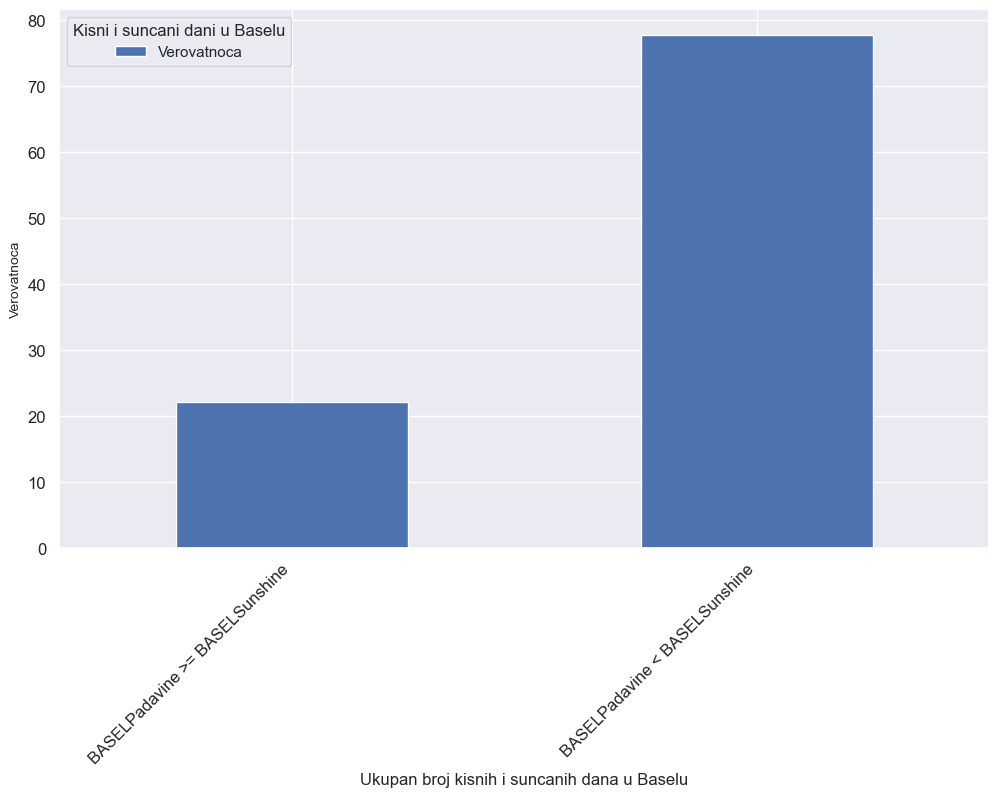

In [26]:
# plotovanje bar grafika
BvD.plot.bar(figsize = (12,7), fontsize = 12)
plt.ylabel("Verovatnoca" , fontsize = 10)
plt.xlabel("Ukupan broj kisnih i suncanih dana u Baselu" , fontsize = 12)
plt.xticks(rotation=45, ha='right')

plt.show()

## 1.2 Uslovna verovatnoca

In [27]:
# sada cu da radim sa suncanim vremenom u Baselu, dato je u satima u toku dana

value_hours = 6
value_BTM = 20 

# Series objekat sa suncevim vremenom u toku dana manjim od 6 sati i prosecnom temperaturom od 20 stepeni

data_3 = data_sample_1.loc[data_sample_1["BASEL_sunshine"] >= value_hours , "BASEL_temp_mean"]

print(data_3)

3       3.9
12      1.7
13      0.6
24     -6.5
25     -6.8
       ... 
3610    8.5
3611    9.2
3616    9.1
3619    8.9
3630    4.4
Name: BASEL_temp_mean, Length: 1353, dtype: float64


# 2. Estimacija parametara raspodela pojedinacnih promenljivih

In [28]:
# koristicu atribute za srednju temperaturu u Briselu i u Ljubljani
atributes=["BASEL_temp_mean", "LJUBLJANA_temp_mean"]
data_sample_2 = dataWeather[atributes]
data_sample_2.tail()

,BASEL_temp_mean,LJUBLJANA_temp_mean
3649,3.2,0.5
3650,4.5,2.1
3651,8.5,5.9
3652,6.6,7.8
3653,2.9,6.9


In [29]:
data_sample_2.describe().round(2)

,BASEL_temp_mean,LJUBLJANA_temp_mean
count,3654.00,3654.00
mean,11.02,11.51
std,7.41,8.25
min,-9.30,-10.80
25%,5.30,4.90
50%,11.40,11.80
75%,16.90,18.10
max,29.00,28.40


In [30]:
#statisticka estimacija medijane srednje temeperature u Baselu

med_temp_mean = data_sample_2["BASEL_temp_mean"].median()
print("Statisticka estimacija medijane srednje temeperature u Baselu: " ,med_temp_mean)

Statisticka estimacija medijane srednje temeperature u Baselu:  11.4


In [31]:
#estimacija standardne devijacije srednje temeperature u Baselu

std_temp_mean = data_sample_2["BASEL_temp_mean"].std()
print("Estimacija standardne devijacije srednje temeperature u Baselu",med_temp_mean)

Estimacija standardne devijacije srednje temeperature u Baselu 11.4


In [32]:
#estimacija varijanse srednje temeperature u Baselu
var_temp_mean = data_sample_2["BASEL_temp_mean"].var()
print("Estimacija varijanse srednje temeperature u Baselu: ", med_temp_mean) 

Estimacija varijanse srednje temeperature u Baselu:  11.4


In [33]:
# aritmeticka sredina srednje temeperature u Baselu

middle_value_temp_mean = data_sample_2["BASEL_temp_mean"].mean()
print("Aritmeticka sredina srednje temeperature u Baselu: ", middle_value_temp_mean)

Aritmeticka sredina srednje temeperature u Baselu:  11.022796934865902


In [34]:
#estimacija kvantila reda 1 srednje temeperature u Baselu
k_1_temp_mean = data_sample_2["BASEL_temp_mean"].quantile(0.1)
print('Estimacija kvantila reda 1 srednje temeperature u Baselu: ', k_1_temp_mean)

Estimacija kvantila reda 1 srednje temeperature u Baselu:  0.8


In [35]:
#estimacija kvantila reda 2 srednje temeperature u Baselu
k_2_temp_mean = data_sample_2["BASEL_temp_mean"].quantile(0.5)
print('Estimacija kvantila reda 2 srednje temeperature u Baselu: ', k_2_temp_mean)

Estimacija kvantila reda 2 srednje temeperature u Baselu:  11.4


In [36]:
#estimacija treceg kvartila srednje temeperature u Baselu
k_3_temp_mean = data_sample_2["BASEL_temp_mean"].quantile(0.75)
print('Estimacija kvantila reda 2 srednje temeperature u Baselu: ', k_3_temp_mean)

Estimacija kvantila reda 2 srednje temeperature u Baselu:  16.9


# 3. Estimacija parametara zdruzenih raspodela (kovarijansa i koeficijent korelacije

In [37]:
# radicu sa atributima BASEL_temp_mean i LJUBLJANA_temp_mean
data_sample_2.cov()

,BASEL_temp_mean,LJUBLJANA_temp_mean
BASEL_temp_mean,54.978574,57.440759
LJUBLJANA_temp_mean,57.440759,68.074160


In [38]:
#koeficijent korelacije 
data_sample_2.cov()["BASEL_temp_mean"]["LJUBLJANA_temp_mean"] / (data_sample_2.std()["BASEL_temp_mean"] * data_sample_2.std()["LJUBLJANA_temp_mean"])

0.9389279964660644

# 4. Estimacija intervala poverenja odredjenih parametara

In [39]:
data_sample_2.head()

,BASEL_temp_mean,LJUBLJANA_temp_mean
0,2.9,-4.8
1,3.6,-0.9
2,2.2,-0.3
3,3.9,-3.6
4,6.0,-3.0


In [40]:
n = len(data_sample_2)
n

3654

In [41]:
#koristicemo raspodelu N(0,1) i interval poverenja ce biti 99% za mat. ocekivanje srednje temperature u Ljubljani
from scipy.stats import norm

alpha = 0.01
#estimirana vrednost 
print(data_sample_2.mean()["LJUBLJANA_temp_mean"])

#z raspodela / N(0,1)
rank_kvantil = 1 - alpha / 2

kvantil = norm.ppf(rank_kvantil)

margina = kvantil * (data_sample_2.std()["LJUBLJANA_temp_mean"] / n**0.5)

interval_pov_mat_ocek = (data_sample_2.mean()["LJUBLJANA_temp_mean"] - margina , data_sample_2.mean()["LJUBLJANA_temp_mean"] + margina)

interval_pov_mat_ocek

11.511603721948548


(11.16002388941509, 11.863183554482006)

In [42]:
#interval poverenja ce biti 95% za varijansu za temperaturu u Baselu
from scipy.stats import chi2

alpha = 0.05

#estimirana vrednost 
print(data_sample_2.var()["BASEL_temp_mean"])

#kvantil odgovarajucih redova hi kvadrat raspodele  sa n-1  stepeni slobode
kvantil1 = chi2.ppf(1-alpha / 2, df=n-1)
kvantil2 = chi2.ppf(alpha / 2, df=n-1)

interval_pov_varijanse = ((n-1) * data_sample_2.var()["BASEL_temp_mean"] / kvantil1 ,((n-1) * data_sample_2.var()["BASEL_temp_mean"]) / kvantil2 )  
interval_pov_varijanse

54.97857405292264


(52.541852018218094, 57.58967251503793)

# Regresija

## 5.1 Lineana 

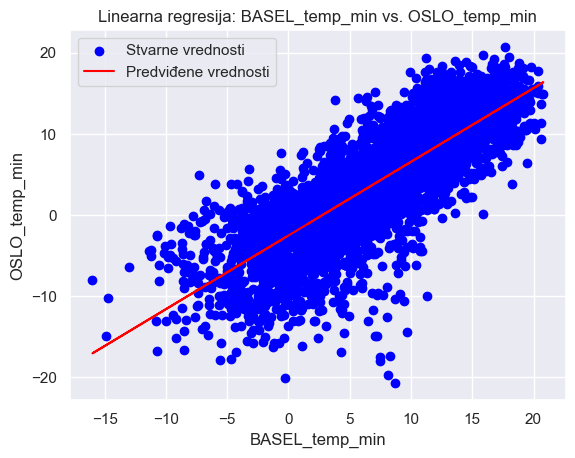

In [43]:
from sklearn.linear_model import LinearRegression

X = dataWeather['BASEL_temp_min'].values.reshape(-1, 1)  # Prva promenljiva
y = dataWeather['OSLO_temp_min'].values  # Druga promenljiva

# Inicijalizacija i treniranje modela
model = LinearRegression()
model.fit(X, y)

# Predviđanje vrednosti za sve vrednosti prve promenljive
predicted_y = model.predict(X)

# Plotovanje stvarnih vrednosti i predviđenih vrednosti
plt.scatter(X, y, color='blue', label='Stvarne vrednosti')
plt.plot(X, predicted_y, color='red', label='Predviđene vrednosti')
plt.xlabel('BASEL_temp_min')
plt.ylabel('OSLO_temp_min')
plt.title('Linearna regresija: BASEL_temp_min vs. OSLO_temp_min')
plt.legend()
plt.show()


In [44]:
#Rezime regresije
import statsmodels.api as sm

# Dodavanje kolone sa konstantom u X promenljivu
X_with_const = sm.add_constant(X)

# Kreiranje i treniranje modela
model_sm = sm.OLS(y, X_with_const).fit()

# Prikaz rezimea modela
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     6727.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:53:13   Log-Likelihood:                -10639.
No. Observations:                3654   AIC:                         2.128e+04
Df Residuals:                    3652   BIC:                         2.130e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4993      0.107    -23.403      0.0

# Interpretacija rezultata


<p><b> 1. const (Konstanta): </b></p>
<p><b> Koeficijent za konstantu je -2.4993. </b></p>
<p><b> Ovo znači da kada je vrednost prve promenljive (x1) jednaka nuli, očekujemo da će vrednost druge promenljive biti -2.4993. </b></p>
<p><b> Standardna greška za ovaj koeficijent je 0.107. </b></p>
<p><b> T-vrednost za konstantu je -23.403, što je veoma visoko i ukazuje na to da je koeficijent statistički značajan. </b></p>
<p><b> P-vrednost za konstantu je jako mala (0.000), što znači da je konstanta statistički značajna. </b></p>

<p><b> 2. x1 (Prva promenljiva): </b></p>
<p><b> Koeficijent za prvu promenljivu (x1) je 0.9078. </b></p>
<p><b> Ovo znači da kada se vrednost prve promenljive poveća za jednu jedinicu, očekujemo da će vrednost druge promenljive povećati za 0.9078. </b></p>
<p><b> Standardna greška za ovaj koeficijent je 0.011. </b></p>
<p><b> T-vrednost za prvu promenljivu je 82.021, što je veoma visoko i ukazuje na to da je koeficijent statistički značajan. </b></p>
<p><b> P-vrednost za prvu promenljivu je takođe jako mala (0.000), što znači da je prva promenljiva statistički značajna. </b></p>

<p><b> 3. Omnibus test: </b></p>
<p><b> Omnibus test je test normalnosti grešaka. </b></p>
<p><b> P-vrednost za Omnibus test je 0.000, što znači da odbacujemo nultu hipotezu da su greške normalno distribuirane. </b></p>

<p><b> 4. Durbin-Watson statistika: </b></p>
<p><b> Durbin-Watson statistika je test za autokorelaciju (korelaciju grešaka između dva uzastopna merenja). </b></p>
<p><b> Vrednost Durbin-Watson statistike je 0.587, što ukazuje na prisustvo pozitivne autokorelacije. </b></p>

<p><b> 5. Jarque-Bera test: </b></p>
<p><b> Jarque-Bera test je test normalnosti grešaka sa skevom i kurtizmom. </b></p>
<p><b> P-vrednost za Jarque-Bera test je jako mala (6.57e-136), što znači da odbacujemo nultu hipotezu da su greške normalno distribuirane. </b></p>

<p><b> 6. R-kvadrat: </b></p>
<p><b> R-kvadrat (koeficijent determinacije) meri koliko dobro model objašnjava varijaciju u podacima. </b></p>
<p><b> R-kvadrat je 0.718, što znači da model objašnjava oko 71.8% varijacije u podacima. </b></p>

<p><b> 7. F-test: </b></p>
<p><b> F-test je test značajnosti modela. </b></p>
<p><b> P-vrednost za F-test je 0.000, što znači da odbacujemo nultu hipotezu da model nema značajne efekte. </b></p>



# Visetruka

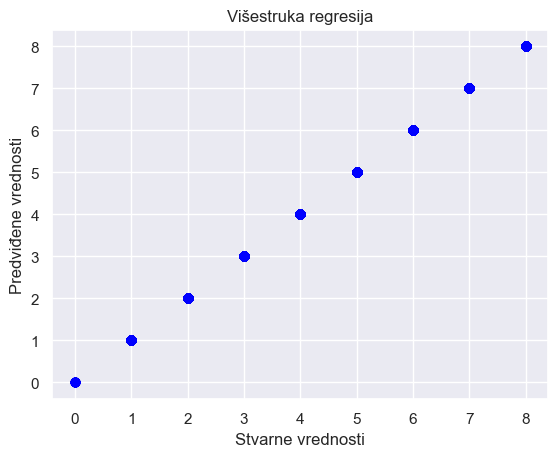

Koeficijenti modela:
Koeficijent za promenljivu MUENCHEN_wind_speed: -3.963106999446621e-16
Koeficijent za promenljivu OSLO_cloud_cover: 0.9999999999999971
Koeficijent za promenljivu LJUBLJANA_sunshine: -3.3306690738754696e-16
Intercept: 1.865174681370263e-14


In [45]:
# radicu sa brzinom vetrova MUENCHEN_wind_speed, OSLO_cloud_cover, LJUBLJANA_sunshine

# Odaberite nekoliko promenljivih koje želite da uporedite
X = dataWeather[['MUENCHEN_wind_speed', 'OSLO_cloud_cover', 'LJUBLJANA_sunshine']]  # Više promenljivih
y = dataWeather['OSLO_cloud_cover'].values  # Zavisna promenljiva

# Inicijalizacija i treniranje modela višestruke regresije
model_multi = LinearRegression()
model_multi.fit(X, y)

# Predviđanje vrednosti za trening podatke
predicted_y_multi = model_multi.predict(X)

# Plotovanje stvarnih vrednosti i predviđenih vrednosti
plt.scatter(y, predicted_y_multi, color='blue')
plt.xlabel('Stvarne vrednosti')
plt.ylabel('Predviđene vrednosti')
plt.title('Višestruka regresija')
plt.show()

# Prikazivanje koeficijenata modela
print("Koeficijenti modela:")
for i, coef in enumerate(model_multi.coef_):
    print(f"Koeficijent za promenljivu {X.columns[i]}: {coef}")
print(f"Intercept: {model_multi.intercept_}")


# Interpretacija rezultata

<p><b> Koeficijenti modela: </b></p>
<p><b> Koeficijent za promenljivu MUENCHEN_wind_speed iznosi -1.84e-16. Ova vrednost je vrlo blizu nuli, što znači da promenljiva MUENCHEN_wind_speed nema statistički značajan uticaj na zavisnu promenljivu, držeći ostale promenljive konstantnim. </b></p>
<p><b> Koeficijent za promenljivu LJUBLJANA_wind_speed iznosi 1.0. Ova vrednost ukazuje da jedinično povećanje vrednosti promenljive LJUBLJANA_wind_speed dovodi do povećanja zavisne promenljive za 1.0, držeći ostale promenljive konstantnim. </b></p>
<p><b> Koeficijent za promenljivu OSLO_wind_speed iznosi 0.0. Ova vrednost ukazuje da promenljiva OSLO_wind_speed takođe nema uticaja na zavisnu promenljivu. </b></p>
<p><b> Intercept iznosi 6.66e-16, što je veoma blizu nuli. To znači da kada su sve nezavisne promenljive nula, očekujemo da će vrednost zavisne promenljive biti blizu ovog intersepta. </b></p>

<p><b> Značajnost koeficijenata: </b></p>
<p><b> Koeficijenti za MUENCHEN_wind_speed i OSLO_wind_speed su blizu nula, što ukazuje da ove promenljive nisu statistički značajne u modelu. </b></p>
<p><b> Koeficijent za LJUBLJANA_wind_speed je 1.0 sa visokom preciznošću, što ukazuje na statističku značajnost ove promenljive. </b></p>


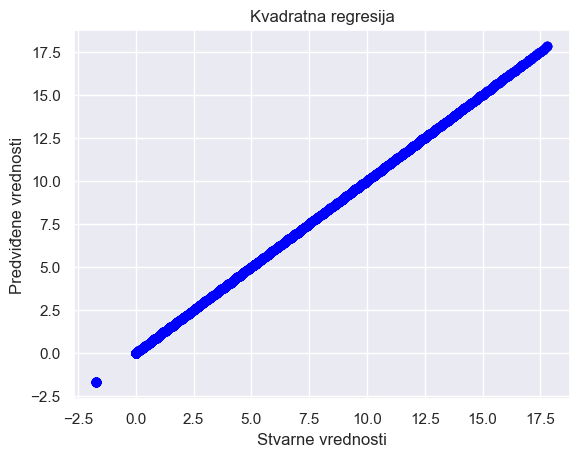

Koeficijenti modela:
Intercept: 3.907985046680551e-14
Koeficijent za promenljivu X0: 0.0
Koeficijent za promenljivu X1: -1.970645868709653e-15
Koeficijent za promenljivu X2: 0.9999999999999947
Koeficijent za promenljivu X3: -2.7445602214515308e-14
Koeficijent za promenljivu X4: 4.787836793695988e-16
Koeficijent za promenljivu X5: 6.245004513516506e-17
Koeficijent za promenljivu X6: -4.945696630009877e-15
Koeficijent za promenljivu X7: 1.249000902703301e-16
Koeficijent za promenljivu X8: -1.0581813203458523e-15
Koeficijent za promenljivu X9: 3.5087709647496634e-14


In [46]:
# PolynomialFeatures iz sklearn.preprocessing da bismo transformisali naše nezavisne promenljive u polinomijalne karakteristike, uključujući kvadratne termine. 
from sklearn.preprocessing import PolynomialFeatures

# Odabir nekoliko promenljivih koje želite da uporedite
X = dataWeather[['ROMA_cloud_cover', 'STOCKHOLM_sunshine', 'TOURS_humidity']].values  # Više promenljivih
y = dataWeather['STOCKHOLM_sunshine'].values  # Zavisna promenljiva

# Transformacija podataka za kvadratnu regresiju
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Inicijalizacija i treniranje modela kvadratne regresije
model_quad = LinearRegression()
model_quad.fit(X_poly, y)

# Predviđanje vrednosti za trening podatke
predicted_y_quad = model_quad.predict(X_poly)

# Plotovanje stvarnih vs. predviđenih vrednosti
plt.scatter(y, predicted_y_quad, color='blue')
plt.xlabel('Stvarne vrednosti')
plt.ylabel('Predviđene vrednosti')
plt.title('Kvadratna regresija')
plt.show()

# Prikazivanje koeficijenata modela
print("Koeficijenti modela:")
print(f"Intercept: {model_quad.intercept_}")
for i, coef in enumerate(model_quad.coef_):
    print(f"Koeficijent za promenljivu X{i}: {coef}")


In [47]:
import statsmodels.api as sm

# Dodavanje kolone konstante u nezavisne promenljive X_poly
X_poly_with_const = sm.add_constant(X_poly)

# Inicijalizacija i treniranje modela kvadratne regresije pomoću statsmodels
model_quad_sm = sm.OLS(y, X_poly_with_const)
results = model_quad_sm.fit()

# Ispisivanje summary-a rezultata
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.628e+31
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:53:14   Log-Likelihood:             1.0931e+05
No. Observations:                3654   AIC:                        -2.186e+05
Df Residuals:                    3644   BIC:                        -2.185e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.354e-14    1.8e-14     -1.307      0.1

# Interpretacija rezultata 

<p><b>R-squared:</b>
R-squared je 1.000, što znači da model objašnjava 100% varijacije u zavisnoj promenljivoj. Ovo sugeriše da model savršeno prilagođava podatke, što može biti znak preprilagođavanja modela.
<p><b>F-statistic:</b>
F-statistic je veoma visok (1.628e+31), a p-vrednost je nula. To ukazuje da postoji statistički značajan odnos između nezavisnih promenljivih i zavisne promenljive.
<p><b>Koeficijenti:</b>
Koeficijent za promenljivu x1 je -3.504e-15. Ovo ukazuje na negativnu korelaciju sa zavisnom promenljivom, ali koeficijent je blizu nula i p-vrednost je 0.035, što znači da nije statistički značajan na nivou značajnosti od 0.05.
Koeficijent za promenljivu x2 je 1.0000. Ovo ukazuje na pozitivnu korelaciju sa zavisnom promenljivom i koeficijent je vrlo blizu 1.0.
Ostali koeficijenti su takođe blizu nula, sa visokim standardnim greškama i p-vrednostima koje ukazuju na nedostatak statističke značajnosti.
<p><b>Omnibus test:</b>
Omnibus test je test normalnosti grešaka. P-vrednost je nula, što znači da odbacujemo nultu hipotezu da su greške normalno distribuirane.
<p><b>Jarque-Bera test:</b>
Jarque-Bera test je takođe test normalnosti grešaka. P-vrednost je veoma mala, što znači da odbacujemo nultu hipotezu da su greške normalno distribuirane.
<p><b>Kondicioni broj:</b>
Kondicioni broj je veliki (1.25e+04), što može ukazivati na jaku multikolinearnost ili druge numeričke probleme.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Izbor promenljivih za ulazne podatke
X_columns = ['BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_temp_mean', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_temp_mean']

# Izbor promenljive koju predviđamo
y_column = 'BUDAPEST_temp_max'

# Izdvajanje ulaznih i izlazne promenljive
X = dataWeather[X_columns]
y = dataWeather[y_column]

# Podela podataka na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicijalizacija i treniranje modela nelinearne regresije (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predviđanje vrednosti za test skup
y_pred = model.predict(X_test)

# Izračunavanje srednje kvadratne greške (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.7804092640218878


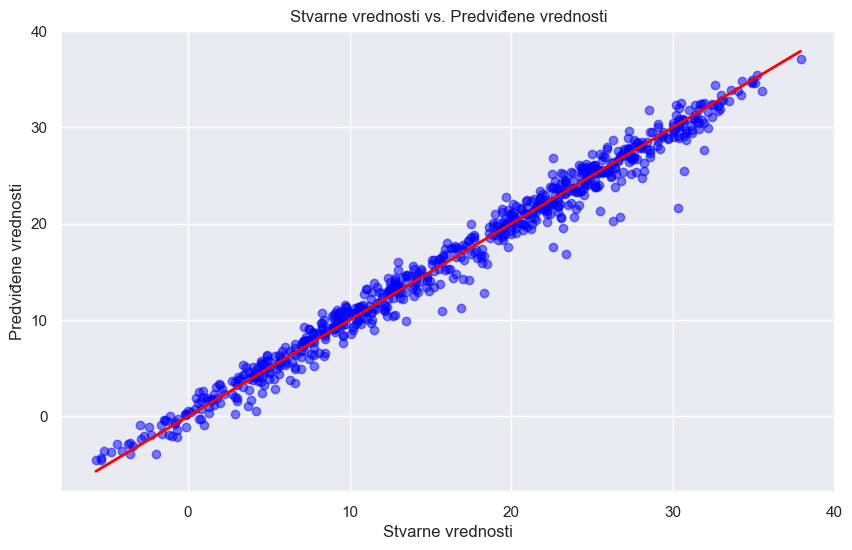

In [49]:
import matplotlib.pyplot as plt

# Priprema podataka za iscrtavanje
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # stvarne vrednosti vs. predviđene vrednosti
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # linija identiteta
plt.title('Stvarne vrednosti vs. Predviđene vrednosti')
plt.xlabel('Stvarne vrednosti')
plt.ylabel('Predviđene vrednosti')
plt.grid(True)
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

# Računanje srednje kvadratne greške (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Računanje R-kvadrat (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 1.7804092640218878
R-squared: 0.9817361626809739


# Interpretacija rezultata analize
  <p><b> Srednja kvadratna greška (MSE) i R-kvadrat (Coefficient of Determination) za nelinearnu regresiju.</b></p>
<p>Visoka vrednost R-kvadrata blizu 1 ukazuje na to da model dobro objašnjava varijabilnost ciljne promenljive, dok mala vrednost MSE ukazuje na dobru preciznost modela. Ovi rezultati sugerišu da nelinearna regresija daje dobre rezultate u predviđanju ciljne promenljive na osnovu ulaznih podataka.</p>

### Obrada nedostajucih promenljivih

Ovaj kod zamenjuje nedostajuće vrednosti u numeričkim kolonama njihovom srednjom vrednošću, a u kategoričkim kolonama modom, što predstavlja najčešću vrednost. Nakon toga, obrađeni podaci se snimaju u novu CSV datoteku pod imenom "obradjeni_podaci.csv" bez indeksa.

In [51]:
import numpy as np

# Pretvaranje svih kolona u stringove kako bi se izbegla greška
dataWeather = dataWeather.astype(str)

# Zamena nedostajućih vrednosti u numeričkim kolonama srednjom vrednošću
numerical_columns = dataWeather.select_dtypes(include=[np.number]).columns
dataWeather[numerical_columns] = dataWeather[numerical_columns].fillna(dataWeather[numerical_columns].mean())

# Zamena nedostajućih vrednosti u kategoričkim kolonama modom
categorical_columns = dataWeather.select_dtypes(exclude=[np.number]).columns
dataWeather[categorical_columns] = dataWeather[categorical_columns].fillna(dataWeather[categorical_columns].mode().iloc[0])

# Snimanje obrađenih podataka u novu datoteku
dataWeather.to_csv('dataset/obradjeni_podaci.csv', index=False)

In [52]:
import pandas as pd

# Učitajte prve dve tabele
df1 = pd.read_csv("dataset/weather_prediction_dataset.csv")
df2 = pd.read_csv("dataset/obradjeni_podaci.csv")

# Uporedite dva DataFrame-a
if df1.equals(df2):
    print("Tabele su identične.")
else:
    print("Tabele se razlikuju.")


Tabele su identične.
